In [37]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

Cargando datos de la base BCHARTS-HITBTCUSD.csv


In [38]:


dates = pd.date_range('2017-01-01', '2017-10-04')
df = pd.DataFrame(index=dates)
df_temp = pd.read_csv('BCHARTS-HITBTCUSD.csv', index_col='Date',parse_dates=True, na_values=['nan'])
df = df.join(df_temp)
df.head()


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
2017-01-01,962.04,995.00,959.71,995.00,9.16,9071.1353,990.298614
2017-01-02,993.00,1038.00,992.68,1008.25,13.13,13399.9869,1020.562597
2017-01-03,1019.90,1027.83,1018.00,1021.72,0.79,804.8431,1018.788734
2017-01-04,1034.16,1124.23,1034.16,1118.11,11.82,13041.2002,1103.316430
2017-01-05,1093.80,1125.00,920.90,999.99,3.58,3747.7465,1046.856564


In [39]:
df.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,277.000000,277.000000,277.000000,277.000000,277.000000,2.770000e+02,277.000000
mean,2160.575523,2243.257004,2071.104368,2172.923791,584.345271,2.115862e+06,2162.049787
std,1190.242027,1232.474623,1131.110954,1193.142752,921.201730,3.588787e+06,1183.412821
min,802.000000,819.780000,650.000000,750.000000,0.020000,2.455880e+01,786.046709
25%,1087.560000,1135.000000,1068.940000,1113.590000,2.520000,2.670335e+03,1104.822156
50%,1891.670000,1992.870000,1819.980000,1917.450000,92.770000,1.969835e+05,1906.097659
75%,2785.410000,2885.710000,2658.280000,2786.580000,1273.560000,3.288424e+06,2759.614994
max,4895.100000,4975.000000,4662.170000,4893.760000,6400.830000,2.169308e+07,4781.239465


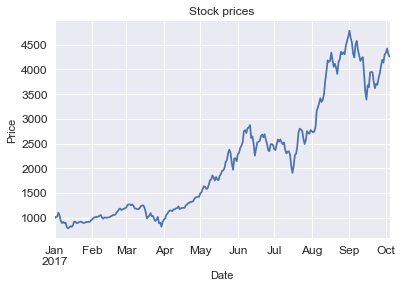

In [40]:
def plot_data(df, title="Stock prices",xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() 
plot_data(df['Weighted Price'])
    

In [41]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)
def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return pd.rolling_std(values,window=window)
def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band, lower_band


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  import sys


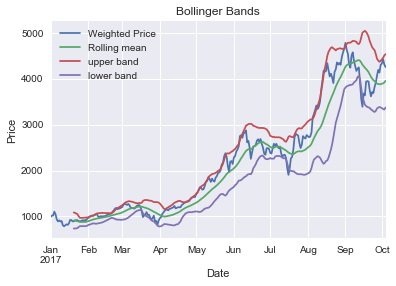

In [42]:
# 1. Compute rolling mean
rm = get_rolling_mean(df['Weighted Price'], window=20)

# 2. Compute rolling standard deviation
rstd = get_rolling_std(df['Weighted Price'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm, rstd)
    
# Plot raw Weighted Price values, rolling mean and Bollinger Bands
ax = df['Weighted Price'].plot(title="Bollinger Bands", label='Weighted Price')
rm.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()
    

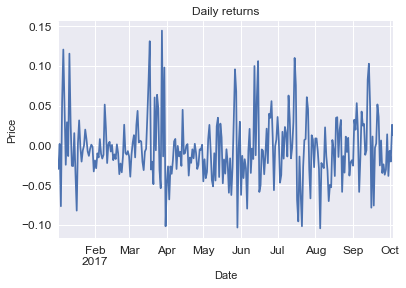

In [44]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    df_w = df['Weighted Price']
    daily_returns = df_w[:-1].values / df_w[1:] - 1
    return daily_returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

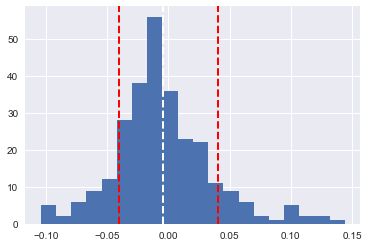

1.5778645172


In [52]:
mean = daily_returns.mean()
std = daily_returns.std()
daily_returns.hist(bins=20)
plt.axvline(mean,color='w',linestyle = 'dashed',linewidth=2)
plt.axvline(std,color='r',linestyle = 'dashed',linewidth=2)
plt.axvline(-std,color='r',linestyle = 'dashed',linewidth=2)
plt.show()
print(daily_returns.kurtosis())

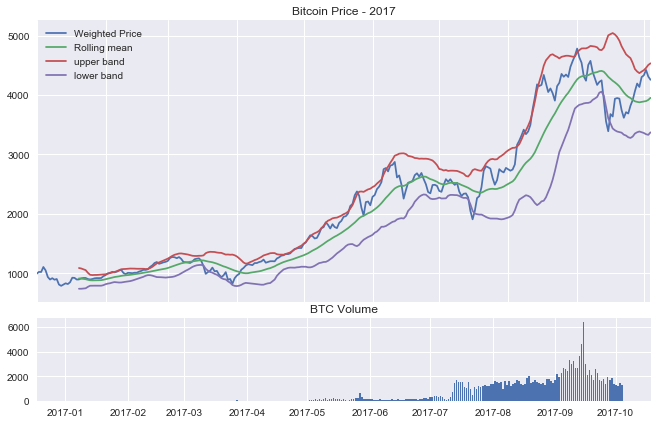

In [56]:
plt.rcParams['figure.figsize'] = 11, 7

main = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# Plot raw Weighted Price values, rolling mean and Bollinger Bands
ax = df['Weighted Price'].plot(title="Bollinger Bands", label='Weighted Price')
rm.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

main.axes.xaxis.set_ticklabels([])

plt.title('Bitcoin Price - 2017')
plt.legend()

vol = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
vol.bar(df.index, df['Volume (BTC)'])

plt.title('BTC Volume')

# savefig('img.png', bbox_inches='tight', transparent=True)